# CIFAR10 Classification Problem

🎯 **Exercise objectives**

* 1️⃣ Implement a CNN to solve a **`10-class classification problem`**

* 2️⃣ Enhance the CNN's performance with **`Data Augmentation Techniques`**

<hr>

🎨 From [Wikipedia](https://en.wikipedia.org/wiki/CIFAR-10) (*click on the link for further information*):

> The **`CIFAR-10`** dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research. The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.

<img src="https://people.minesparis.psl.eu/fabien.moutarde/ES_MachineLearning/mini-projets/cifar10_notebook_fichiers/cifar_10.png">

⭐️ This dataset is iconic in the research community as many enhancements for image recognition have been achieved on this dataset. After achieving great performance on this dataset, researchers moved to the more advanced CIFAR-100.

From the [University of Toronto](https://www.cs.toronto.edu/~kriz/cifar.html):

> This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).


## (1) Loading the CIFAR10 Dataset

In [1]:
from tensorflow.keras.datasets import cifar10
import numpy as np

(images_train, labels_train), (images_test, labels_test) = cifar10.load_data()

labels = ['airplane',
          'automobile',
          'bird',
          'cat',
          'deer',
          'dog',
          'frog',
          'horse',
          'ship',
          'truck']

print(images_train.shape, images_test.shape)
unique, counts = np.unique(labels_train, return_counts=True)
dict(zip(unique, counts))

170498071/170498071 [==============================] - 13s 0us/step
(50000, 32, 32, 3) (10000, 32, 32, 3)


{0: 5000,
 1: 5000,
 2: 5000,
 3: 5000,
 4: 5000,
 5: 5000,
 6: 5000,
 7: 5000,
 8: 5000,
 9: 5000}

### (1.1) Smaller dataset

In [2]:
# Considering only 1/10th of the 50_000 images
reduction_factor = 10

# Choosing the random indices of small train set and small test set
idx_train =  np.random.choice(len(images_train), round(len(images_train)/reduction_factor), replace=False)
idx_test =  np.random.choice(len(images_test), round(len(images_test)/reduction_factor), replace=False)

# Collecting the two subsamples images_train_small and images_test_small from images_train and images_test
images_train_small = images_train[idx_train]
images_test_small = images_test[idx_test]
# and their corresponding labels
labels_train_small = labels_train[idx_train]
labels_test_small = labels_test[idx_test]

print("------------------ Before -----------------")
print(images_train.shape, images_test.shape)

print("")

print("--- After applying the reduction factor ---")
print(images_train_small.shape, images_test_small.shape)

print("")
print("-"*43)

unique, counts = np.unique(labels_train_small, return_counts=True)
dict(zip(unique, counts))

------------------ Before -----------------
(50000, 32, 32, 3) (10000, 32, 32, 3)

--- After applying the reduction factor ---
(5000, 32, 32, 3) (1000, 32, 32, 3)

-------------------------------------------


{0: 541,
 1: 475,
 2: 494,
 3: 491,
 4: 495,
 5: 486,
 6: 503,
 7: 504,
 8: 483,
 9: 528}

👇 Previewing the images

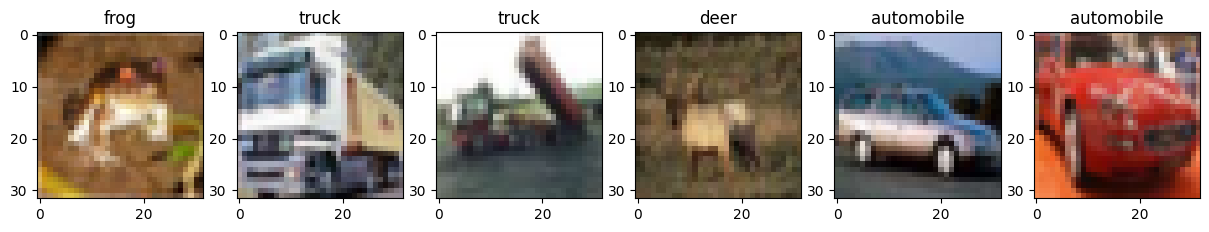

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
for i in range(6):
    plt.subplot(1,6, i+1)
    img = images_train[i]
    label = labels_train[i][0]
    plt.imshow(img)
    plt.title(labels[label])

### (1.2) Image preprocesing

In [4]:
### Normalizing pixels' intensities betwee 0 and 1
X_train = images_train / 255.
X_train_small = images_train_small / 255.
X_test = images_test / 255.
X_test_small = images_test_small / 255.

### Encoding the labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(labels_train, 10)
y_train_small = to_categorical(labels_train_small, 10)
y_test = to_categorical(labels_test, 10)
y_test_small = to_categorical(labels_test_small, 10)

## (2) Iterate on CNN architecture using the small training set

In [5]:
from tensorflow.keras import regularizers, Sequential, layers, models
reg_l1 = regularizers.L1(0.01)
reg_l2 = regularizers.L2(0.01)
reg_l1_l2 = regularizers.l1_l2(l1=0.005, l2=0.0005)

def initialize_model():
    '''instanciate and return the CNN architecture of your choice with less than 150,000 params'''
    model = models.Sequential()

    ### First Convolution & MaxPooling
    model.add(layers.Conv2D(16, (4,4), input_shape=(32, 32, 3), strides=(1,1), padding='same', activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Dropout(rate=0.2))

    ### Second Convolution & MaxPooling
    model.add(layers.Conv2D(32, (3,3), strides=(1,1), padding='same', activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Dropout(rate=0.2))

    ### Third Convolution & MaxPooling
    model.add(layers.Conv2D(64, (2,2), strides=(1,1), padding='same', activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Dropout(rate=0.2))

    # ### Fourth Convolution & MaxPooling
    model.add(layers.Conv2D(64, (2,2), strides=(1,1), padding='same', activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Dropout(rate=0.2))

    ### Flattening
    model.add(layers.Flatten())


    ### One Fully Connected layer - "Fully Connected" is equivalent to saying "Dense"
    model.add(layers.Dense(10, activation='relu'))


    ### Last layer - Classification Layer with 10 outputs
    model.add(layers.Dense(10, activation='softmax'))

    ### Model compilation
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

    return model

In [6]:
def compile_model(model):
    '''return a compiled model suited for the CIFAR-10 task'''
    model.compile(loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])
    return model

In [7]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=30, restore_best_weights=True)

model = initialize_model()
compile_model(model)
history = model.fit(X_train_small, y_train_small, batch_size=32, validation_split=0.3, epochs=200, callbacks=[es], shuffle=True)

Epoch 1/200
110/110 [==============================] - 14s 15ms/step - loss: 2.3034 - accuracy: 0.1029 - val_loss: 2.2971 - val_accuracy: 0.1720
Epoch 2/200
110/110 [==============================] - 1s 10ms/step - loss: 2.2606 - accuracy: 0.1529 - val_loss: 2.2347 - val_accuracy: 0.1720
Epoch 3/200
110/110 [==============================] - 1s 12ms/step - loss: 2.1897 - accuracy: 0.1920 - val_loss: 2.2323 - val_accuracy: 0.1560
Epoch 4/200
110/110 [==============================] - 1s 9ms/step - loss: 2.1514 - accuracy: 0.2166 - val_loss: 2.1185 - val_accuracy: 0.2593
Epoch 5/200
110/110 [==============================] - 2s 14ms/step - loss: 2.0763 - accuracy: 0.2223 - val_loss: 1.9833 - val_accuracy: 0.2460
Epoch 6/200
110/110 [==============================] - 2s 16ms/step - loss: 1.9812 - accuracy: 0.2409 - val_loss: 1.8798 - val_accuracy: 0.2933
Epoch 7/200
110/110 [==============================] - 1s 13ms/step - loss: 1.8904 - accuracy: 0.2780 - val_loss: 1.8236 - val_accuracy:

### Training History

In [8]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label = 'train' + exp_name)
    ax1.plot(history.history['val_loss'], label = 'val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

(<Axes: title={'center': 'loss'}>, <Axes: title={'center': 'Accuracy'}>)

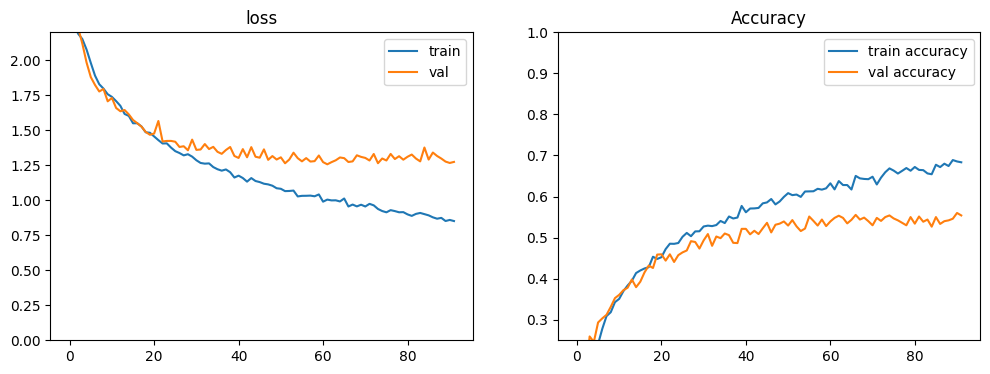

In [9]:
plot_history(history)

In [12]:
## Finetuning model

In [10]:
#patience = 10

from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10, restore_best_weights=True)

model = initialize_model()
compile_model(model)
history = model.fit(X_train_small, y_train_small, batch_size=32, validation_split=0.3, epochs=200, callbacks=[es], shuffle=True)

Epoch 1/200
110/110 [==============================] - 3s 12ms/step - loss: 2.3035 - accuracy: 0.0943 - val_loss: 2.3012 - val_accuracy: 0.1260
Epoch 2/200
110/110 [==============================] - 1s 11ms/step - loss: 2.3022 - accuracy: 0.1017 - val_loss: 2.2984 - val_accuracy: 0.1060
Epoch 3/200
110/110 [==============================] - 1s 11ms/step - loss: 2.2965 - accuracy: 0.1154 - val_loss: 2.2947 - val_accuracy: 0.1133
Epoch 4/200
110/110 [==============================] - 1s 8ms/step - loss: 2.2208 - accuracy: 0.1543 - val_loss: 2.2429 - val_accuracy: 0.1433
Epoch 5/200
110/110 [==============================] - 1s 7ms/step - loss: 2.0349 - accuracy: 0.2363 - val_loss: 1.9165 - val_accuracy: 0.2827
Epoch 6/200
110/110 [==============================] - 1s 7ms/step - loss: 1.8992 - accuracy: 0.2794 - val_loss: 1.8695 - val_accuracy: 0.2700
Epoch 7/200
110/110 [==============================] - 1s 7ms/step - loss: 1.8415 - accuracy: 0.2966 - val_loss: 1.7609 - val_accuracy: 0.3

(<Axes: title={'center': 'loss'}>, <Axes: title={'center': 'Accuracy'}>)

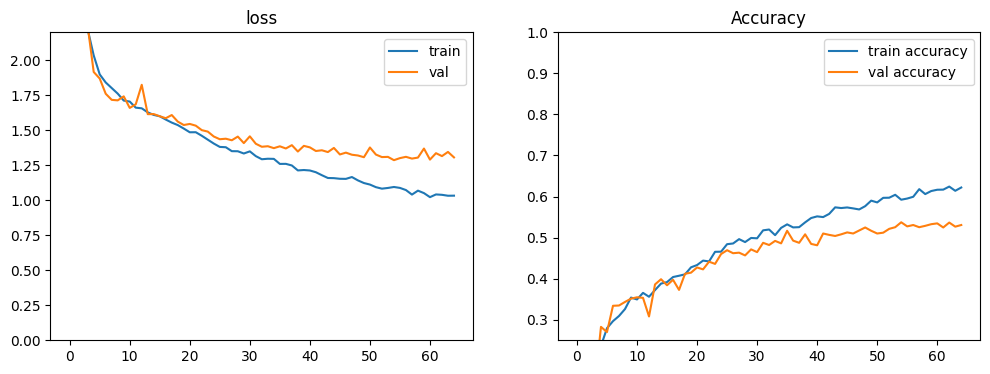

In [11]:
plot_history(history)

## (3) Increase the size of training data

In [13]:
# Considering only 1/5th of the 50_000 images
reduction_factor = 5

# Choosing the random indices of small train set and small test set
idx_train =  np.random.choice(len(images_train), round(len(images_train)/reduction_factor), replace=False)
idx_test =  np.random.choice(len(images_test), round(len(images_test)/reduction_factor), replace=False)

# Collecting the two subsamples images_train_small and images_test_small from images_train and images_test
images_train_medium = images_train[idx_train]
images_test_medium = images_test[idx_test]
# and their corresponding labels
labels_train_medium = labels_train[idx_train]
labels_test_medium = labels_test[idx_test]

### Normalizing pixels' intensities
X_train = images_train / 255.
X_train_medium = images_train_medium / 255.
X_test = images_test / 255.
X_test_medium = images_test_medium / 255.

### Encoding the labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(labels_train, 10)
y_train_medium = to_categorical(labels_train_medium, 10)
y_test = to_categorical(labels_test, 10)
y_test_medium = to_categorical(labels_test_medium, 10)

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=30, restore_best_weights=True)

model = initialize_model()
compile_model(model)
history = model.fit(X_train_medium, y_train_medium, batch_size=64, validation_split=0.3, epochs=200, callbacks=[es], shuffle=True)

Epoch 1/200
110/110 [==============================] - 3s 13ms/step - loss: 2.2868 - accuracy: 0.1259 - val_loss: 2.2424 - val_accuracy: 0.1767
Epoch 2/200
110/110 [==============================] - 1s 7ms/step - loss: 2.1217 - accuracy: 0.2083 - val_loss: 1.9876 - val_accuracy: 0.2613
Epoch 3/200
110/110 [==============================] - 1s 7ms/step - loss: 1.9343 - accuracy: 0.2761 - val_loss: 1.8633 - val_accuracy: 0.3280
Epoch 4/200
110/110 [==============================] - 1s 7ms/step - loss: 1.8618 - accuracy: 0.2949 - val_loss: 1.7932 - val_accuracy: 0.3590
Epoch 5/200
110/110 [==============================] - 1s 8ms/step - loss: 1.7831 - accuracy: 0.3280 - val_loss: 1.7576 - val_accuracy: 0.3717
Epoch 6/200
110/110 [==============================] - 1s 7ms/step - loss: 1.7335 - accuracy: 0.3581 - val_loss: 1.7245 - val_accuracy: 0.3780
Epoch 7/200
110/110 [==============================] - 1s 8ms/step - loss: 1.7027 - accuracy: 0.3704 - val_loss: 1.6540 - val_accuracy: 0.412

(<Axes: title={'center': 'loss'}>, <Axes: title={'center': 'Accuracy'}>)

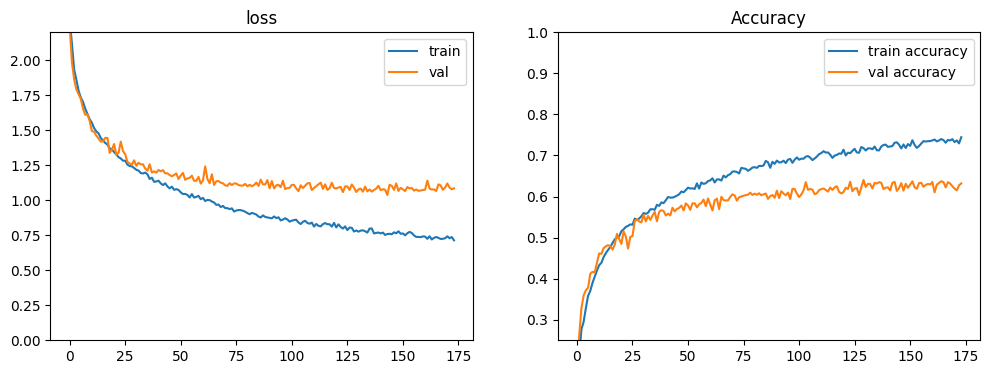

In [15]:
plot_history(history)

## (4) 🎁📚 Data augmentation

In [20]:
X_augmented_iterator = datagen.flow(X_train, shuffle=False, batch_size=1)
X_augmented_iterator

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center = False,
    featurewise_std_normalization = False,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    zoom_range = (0.8, 1.2),
    )

datagen.fit(X_train)
datagen

**visualize the augmented images**

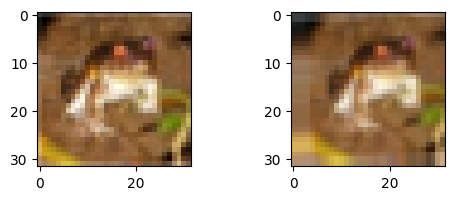

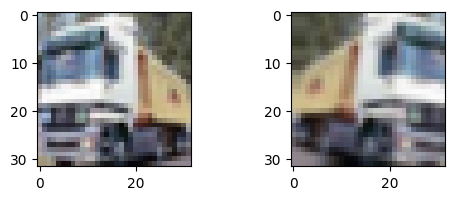

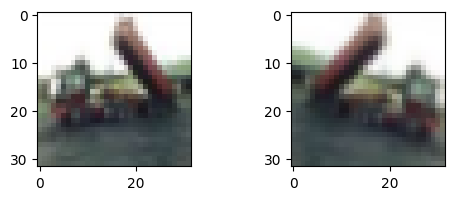

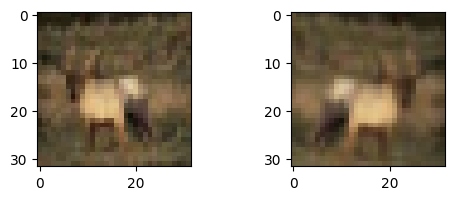

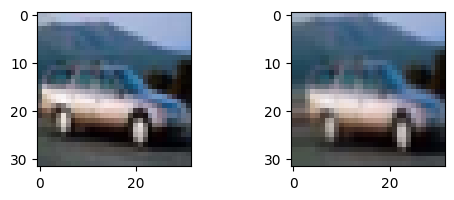

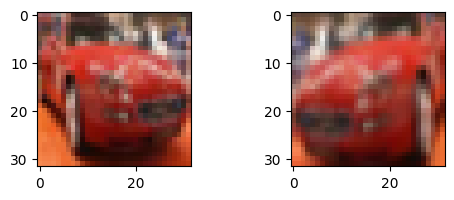

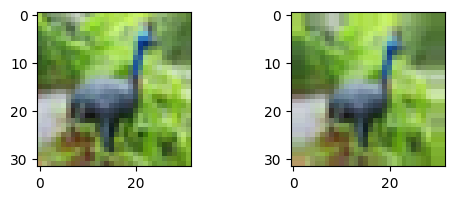

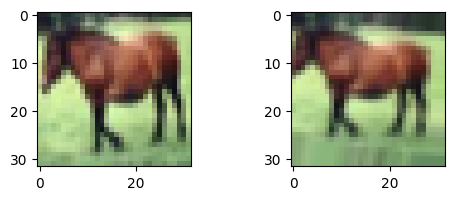

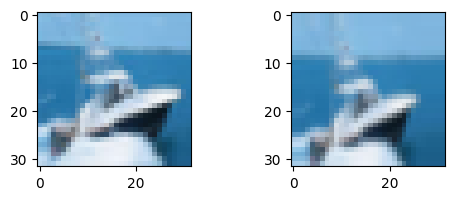

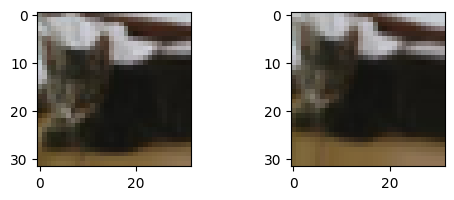

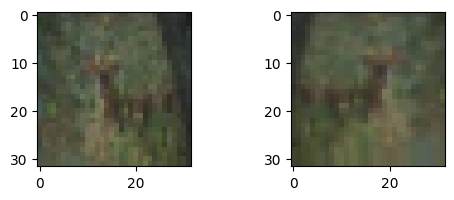

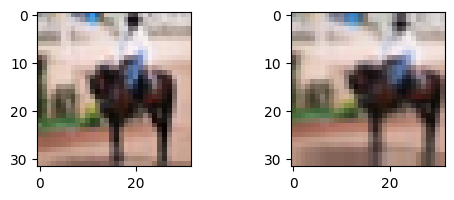

In [22]:
import numpy as np

for i, (raw_image, augmented_image) in enumerate(zip(X_train, X_augmented_iterator)):
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2))
    ax1.imshow(raw_image)
    ax2.imshow(augmented_image[0])
    plt.show()

    if i > 10:
        break

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

# The model
model_aug = initialize_model()
model_aug = compile_model(model_aug)

# The data generator
X_tr = X_train[:40000]
y_tr = y_train[:40000]
X_val = X_train[40000:]
y_val = y_train[40000:]
train_flow = datagen.flow(X_tr, y_tr, batch_size = 64)

# The early stopping criterion
es = EarlyStopping(patience = 3)

# The fit
history_aug = model_aug.fit(train_flow,
                        epochs = 50,
                        callbacks = [es],
                        validation_data = (X_val, y_val))


Epoch 1/50
625/625 [==============================] - 35s 54ms/step - loss: 1.9873 - accuracy: 0.2383 - val_loss: 1.7152 - val_accuracy: 0.3461
Epoch 2/50
625/625 [==============================] - 29s 46ms/step - loss: 1.7151 - accuracy: 0.3558 - val_loss: 1.5291 - val_accuracy: 0.4436
Epoch 3/50
625/625 [==============================] - 29s 46ms/step - loss: 1.5927 - accuracy: 0.4064 - val_loss: 1.4376 - val_accuracy: 0.4782
Epoch 4/50
625/625 [==============================] - 28s 45ms/step - loss: 1.5294 - accuracy: 0.4353 - val_loss: 1.4128 - val_accuracy: 0.4867
Epoch 5/50
625/625 [==============================] - 28s 45ms/step - loss: 1.4666 - accuracy: 0.4624 - val_loss: 1.4205 - val_accuracy: 0.4833
Epoch 6/50
625/625 [==============================] - 31s 50ms/step - loss: 1.4302 - accuracy: 0.4776 - val_loss: 1.3162 - val_accuracy: 0.5286
Epoch 7/50
625/625 [==============================] - 29s 46ms/step - loss: 1.3999 - accuracy: 0.4929 - val_loss: 1.2322 - val_accuracy:

Model performance with an augmented dataset

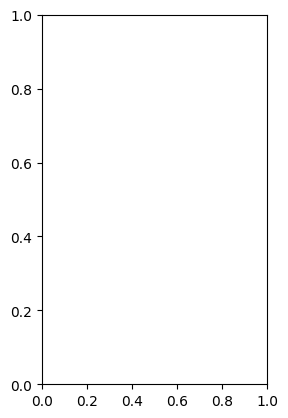

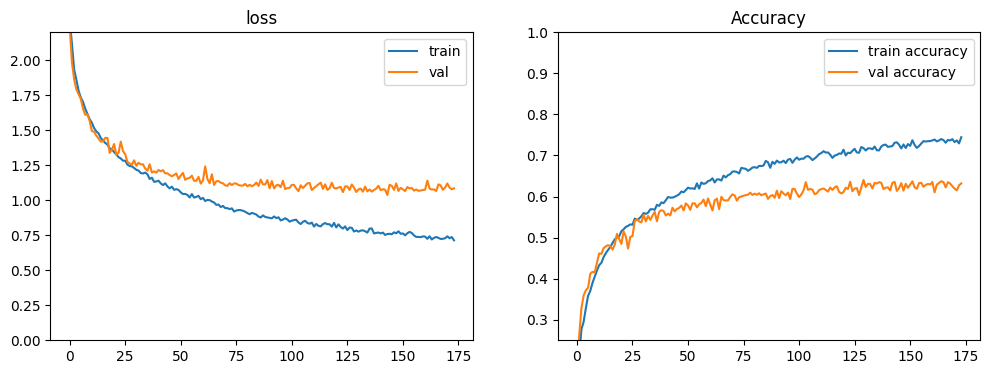

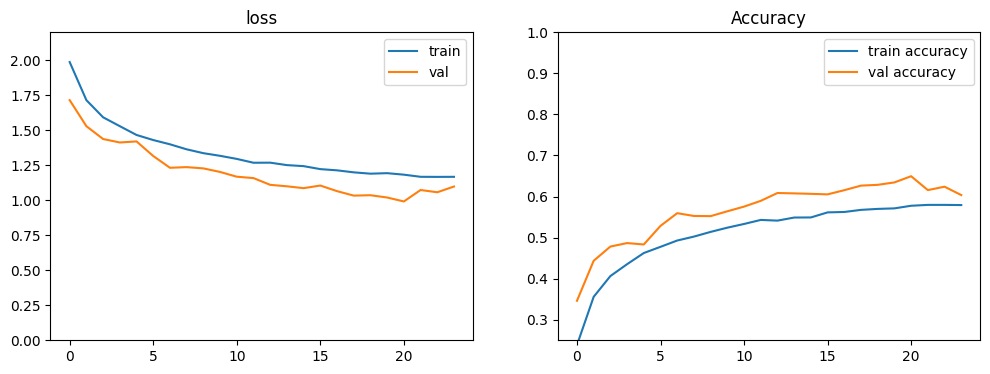

In [24]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1);
plot_history(history);
plt.subplot(1,2,2);
plot_history(history_aug);